図12.14のプロット

In [1]:
#計算とグラフプロットに必要なモジュールの読み込み
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 
from scipy import signal

In [2]:
#1次遅れ系のパラメータを与える
T1 = 0.1 #時定数T=0.1の場合
T2 = 1 #時定数T=1の場合
T3 = 10 #時定数T=10の場合

#分子・分母多項式と伝達関数表現を与える
num = [0, 1] #分子多項式
den1 = [T1, 1] #T=0.1の場合の分母多項式
den2 = [T2, 1] #T=1の場合の分母多項式
den3 = [T3, 1] #T=10の場合の分母多項式

#伝達関数表現を与える
sys1 = signal.lti(num, den1) #T=0.1の場合の伝達関数表現（signal.ltiの場合）
sys2 = signal.lti(num, den2) #T=1の場合の伝達関数表現（signal.ltiの場合）
sys3 = signal.lti(num, den3) #T=10の場合の伝達関数表現（signal.ltiの場合）

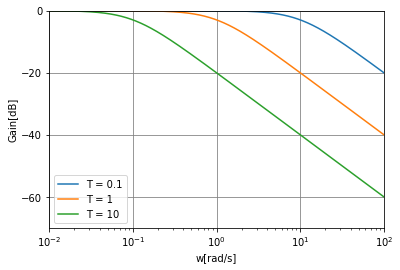

In [3]:
#角周波数の範囲を指定
w = np.logspace(-2, 2, 1000) #対数的に等間隔なベクトルの生成(10^{-2}から10^{2}で1000点)

# ゲインと位相の計算
[w1, gain1, phase1] = signal.bode(sys1, w) #ゲインと位相
[w2, gain2, phase2] = signal.bode(sys2, w) #ゲインと位相
[w3, gain3, phase3] = signal.bode(sys3, w) #ゲインと位相

# ゲイン線図のプロット
plt.semilogx(w1, gain1, label="T = 0.1") #ゲイン線図をプロット
plt.semilogx(w2, gain2, label="T = 1") #ゲイン線図をプロット
plt.semilogx(w3, gain3, label="T = 10") #ゲイン線図をプロット
plt.xlim([0.01,100])#横軸（角周波数）の範囲の指定
plt.ylim([-70,0]) #縦軸の範囲の指定
plt.yticks([-60,-40,-20,0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

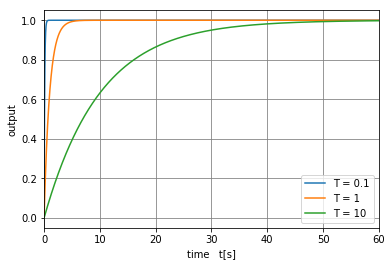

In [4]:
#伝達関数表現を与える
sys1 = matlab.tf(num, den1) #T=0.1の場合の伝達関数表現
sys2 = matlab.tf(num, den2) #T=1の場合の伝達関数表現
sys3 = matlab.tf(num, den3) #T=10の場合の伝達関数表現

#時間変数の定義
t = arange(0, 60, 0.01) #0から60まで0.1刻み

#ステップ応答の計算
y1, t1 = matlab.step(sys1,t) #T=0.1の場合のステップ応答
y2, t2 = matlab.step(sys2,t) #T=1の場合のステップ応答
y3, t3 = matlab.step(sys3,t) #T=10の場合のステップ応答

plt.plot(t1, y1, label = "T = 0.1") #ステップ応答をプロット
plt.plot(t2, y2, label = "T = 1") #ステップ応答をプロット
plt.plot(t3, y3, label = "T = 10") #ステップ応答をプロット
plt.xlim([0,60]) #横軸（時間軸の範囲の指定）
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("output") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示